Predicts whether the job description is fake or not

This dataset contains about 18k job descriptions out of which about 800 are FAKE. This data consists of both text and numerical features about the job.


In [1]:
# import analytics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
# read dataset
fj=pd.read_csv('fake_job_postings.csv')
fj.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
fj.shape
#(rows, cols)

(17880, 18)

In [4]:
fj.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
fj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
# this dataset have features of both integer and object type
# so much of null data here
# lets try to fill or remove those so that it becomes feasible to get some insights in data

In [7]:
fj['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [8]:
print("the percentage of fake jobs = {}".format((866/fj.shape[0])*100))

the percentage of fake jobs = 4.8434004474272925


In [9]:
# check if any NaN(null values)
fj.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [10]:
# selection of features from a list of some columns of object-type and adding two new features (length of string & words count) for each columns
cols=['title', 'company_profile', 'description', 'requirements', 'benefits']
for c in cols:
    fj[c]= fj[c].fillna(" ")

def addft(fj):
    for c in cols:
        fj[c+"_len"]= fj[c].apply(lambda x : len(str(x)))
        fj[c+"_wc"]= fj[c].apply(lambda x : len(str(x.split())))

addft(fj)

In [11]:
fj.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,title_len,title_wc,company_profile_len,company_profile_wc,description_len,description_wc,requirements_len,requirements_wc,benefits_len,benefits_wc
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,...,16,23,885,1309,905,1278,852,1198,1,2
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,41,60,1286,1745,2077,3020,1433,2033,1292,1972
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,...,39,52,879,1302,355,506,1363,1856,1,2
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,33,49,614,868,2600,3637,1429,1958,782,1074
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,19,29,1628,2250,1520,1939,757,1025,21,31


In [12]:
# dropping unnecessary object-type columns
drop_cols=['job_id','title', 'location', 'department', 'salary_range','company_profile', 'description', 'requirements', 'benefits']
fj= fj.drop(drop_cols, axis=1)

In [13]:
# replacing / filling the null values to the features that occured the most(mode) in each column
check=[]
cat_cols=['employment_type','required_experience', 'required_education', 'industry', 'function']
for c in cat_cols:
    fj[c]= fj[c].replace(np.nan, fj[c].mode()[0], regex=True)
    check.append(fj[c].mode())
fj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   telecommuting        17880 non-null  int64 
 1   has_company_logo     17880 non-null  int64 
 2   has_questions        17880 non-null  int64 
 3   employment_type      17880 non-null  object
 4   required_experience  17880 non-null  object
 5   required_education   17880 non-null  object
 6   industry             17880 non-null  object
 7   function             17880 non-null  object
 8   fraudulent           17880 non-null  int64 
 9   title_len            17880 non-null  int64 
 10  title_wc             17880 non-null  int64 
 11  company_profile_len  17880 non-null  int64 
 12  company_profile_wc   17880 non-null  int64 
 13  description_len      17880 non-null  int64 
 14  description_wc       17880 non-null  int64 
 15  requirements_len     17880 non-null  int64 
 16  requ

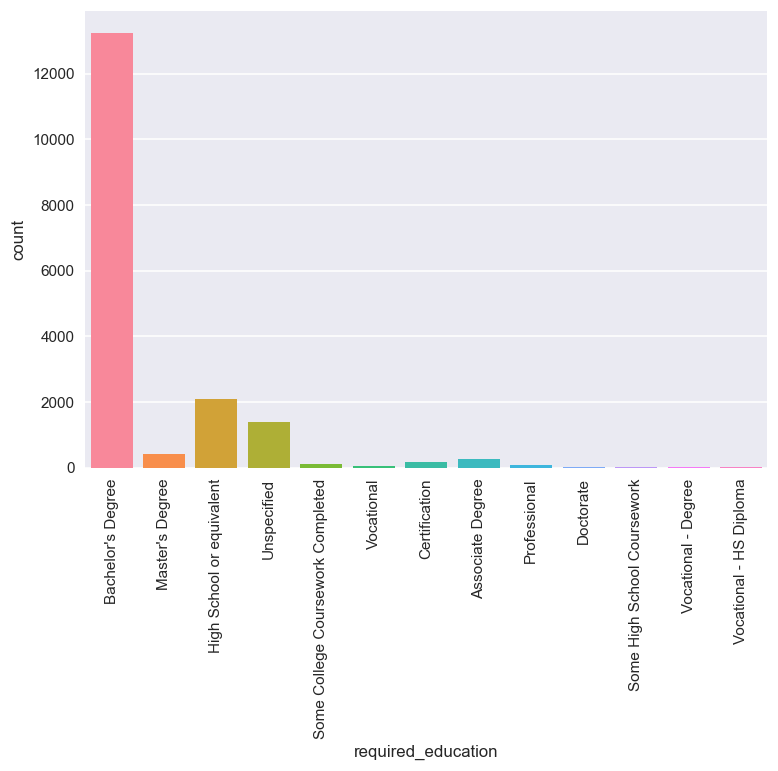

In [14]:
plt.figure(dpi=110)
sns.countplot(fj.required_education,saturation=1)

plt.xticks(rotation=90)
plt.show()

It is clear from the above plot that there is high demand of Bachelor's Degree as the educational requirement for hiring.

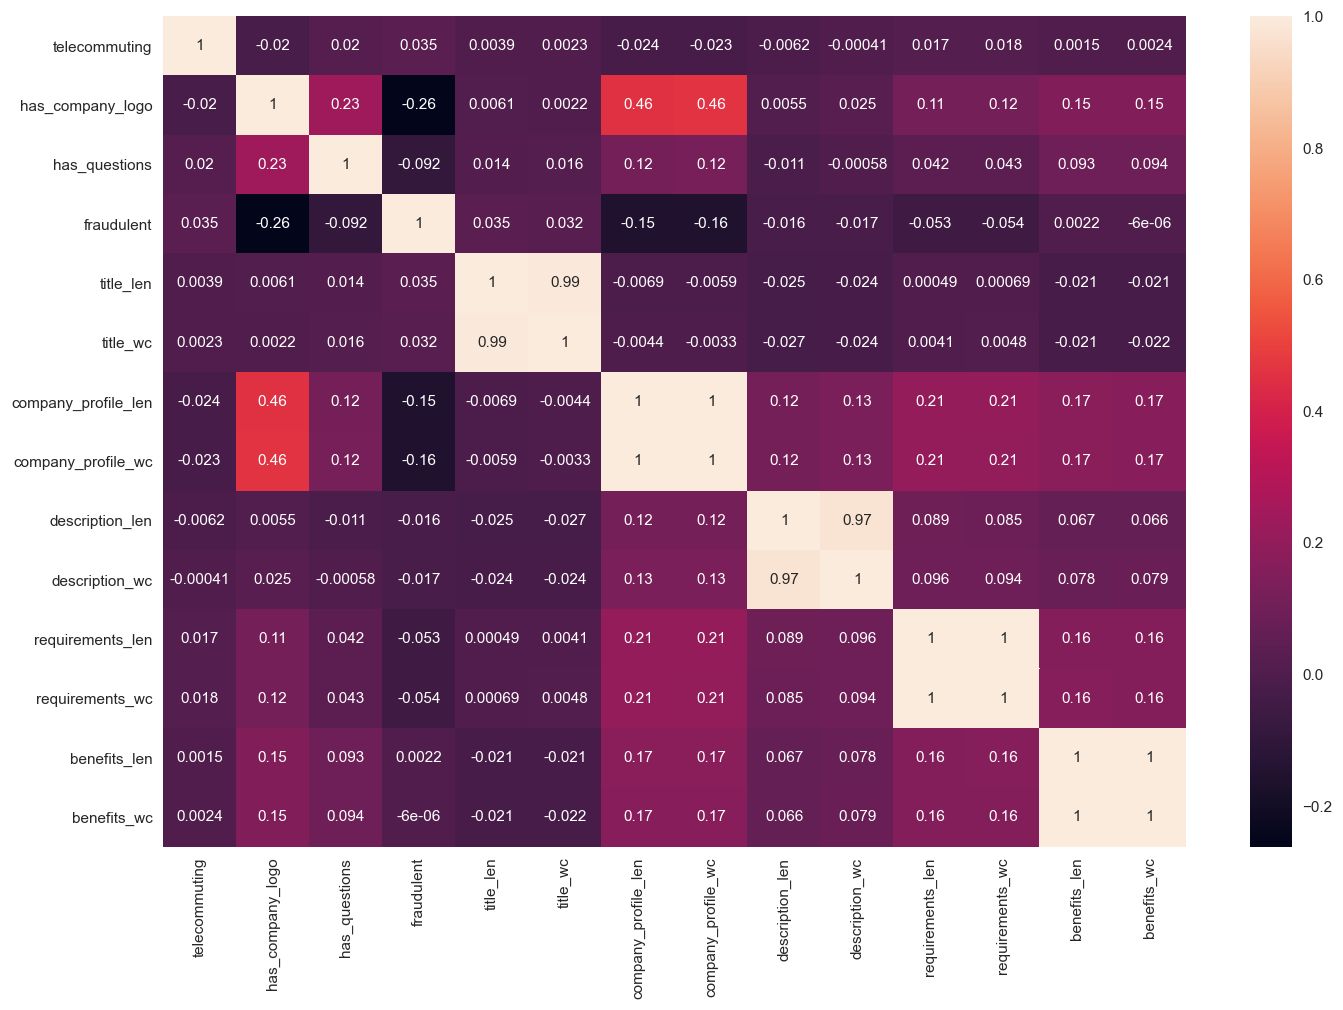

In [15]:
# lets get the correlations among the columns
corr=fj.corr()
plt.figure(figsize=(15,10), dpi=110)
sns.heatmap(corr, annot=True)

In [16]:
# there is not much correlations among columns

In [17]:
# encoding the categorical columns 
# cat_cols=['employment_type','required_experience', 'required_education', 'industry', 'function']
for c in cat_cols:
    encode=pd.get_dummies(fj[c])
fj=pd.concat([fj, encode],axis=1)

In [18]:
# drop categorical columns
fj= fj.drop(cat_cols, axis=1)
fj.head()

,telecommuting,has_company_logo,has_questions,fraudulent,title_len,title_wc,company_profile_len,company_profile_wc,description_len,description_wc,...,Public Relations,Purchasing,Quality Assurance,Research,Sales,Science,Strategy/Planning,Supply Chain,Training,Writing/Editing
0,0,1,0,0,16,23,885,1309,905,1278,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,41,60,1286,1745,2077,3020,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,39,52,879,1302,355,506,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,33,49,614,868,2600,3637,...,0,0,0,0,1,0,0,0,0,0
4,0,1,1,0,19,29,1628,2250,1520,1939,...,0,0,0,0,0,0,0,0,0,0


In [19]:
fj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   telecommuting           17880 non-null  int64
 1   has_company_logo        17880 non-null  int64
 2   has_questions           17880 non-null  int64
 3   fraudulent              17880 non-null  int64
 4   title_len               17880 non-null  int64
 5   title_wc                17880 non-null  int64
 6   company_profile_len     17880 non-null  int64
 7   company_profile_wc      17880 non-null  int64
 8   description_len         17880 non-null  int64
 9   description_wc          17880 non-null  int64
 10  requirements_len        17880 non-null  int64
 11  requirements_wc         17880 non-null  int64
 12  benefits_len            17880 non-null  int64
 13  benefits_wc             17880 non-null  int64
 14  Accounting/Auditing     17880 non-null  uint8
 15  Administrative     

In [20]:
# successfully transformed all the columns(non-numerical) to integer-type

In [21]:
# train models

In [22]:
# importing models and various tools
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [23]:
# features and target selection
X= fj.drop(['fraudulent'], axis=1)
y= fj['fraudulent']

In [24]:
# scaling features so that they remain within specific scale
scalar=StandardScaler()
X=pd.DataFrame(scalar.fit_transform(X.values), index=X.index, columns = X.columns)

In [25]:
# splitting the test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

We use KFold to avoid overfitting of the models and get some relevant scores. Based on the score we choose the best model.

In [26]:
#Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 2)))
models.append(('CART', DecisionTreeClassifier(min_samples_leaf=1, random_state=1)))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators=200, min_samples_leaf=1, random_state=1, n_jobs=-1)))

#testing models

results = []
res_acc=[]
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    acc = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    res_acc.append(acc)
    names.append(name)
    msg = '%s: %f (%f) // %f (%f)' % (name, cv_results.mean(), cv_results.std(), acc.mean(), acc.std())
    print(msg)

LR: 0.847502 (0.021427) // 0.952833 (0.003120)
KNN: 0.807443 (0.033075) // 0.965821 (0.004558)
CART: 0.799904 (0.040332) // 0.960477 (0.004586)
SVM: 0.854942 (0.037422) // 0.955008 (0.004400)
RF: 0.972524 (0.009338) // 0.972160 (0.005352)


In [27]:
# Random forest classifier is best in identifying negatives and positives, out-performing other models.
# also KNN performed well
# we shall try to improve these two models and jump to the final result.

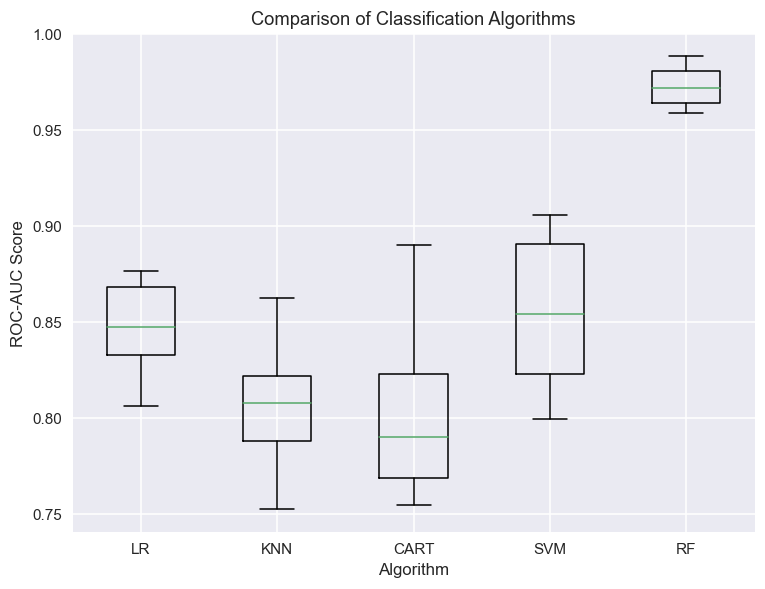

In [28]:
# plotting boxplot for comparing algorithms
# ROC-AUC Score
fig = plt.figure(figsize=(8,6),dpi=110)
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

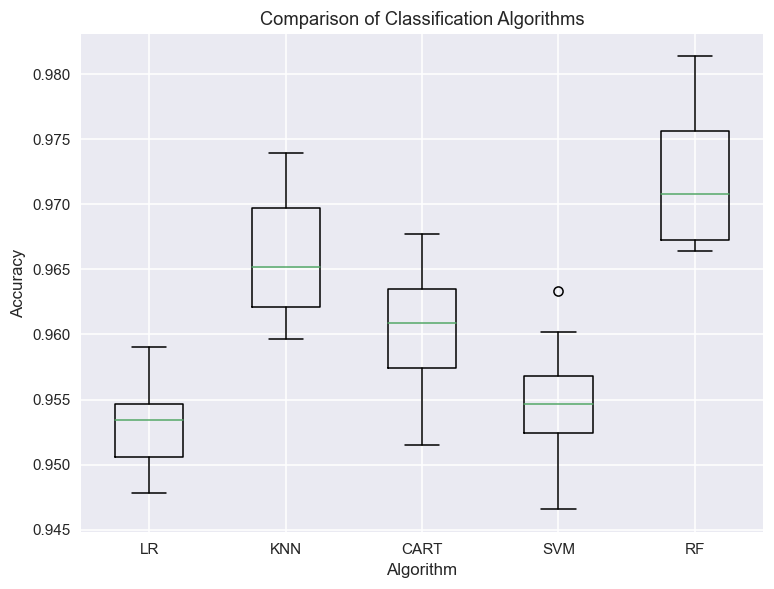

In [29]:
# plotting boxplot for comparing algorithms
# Accuracy
fig = plt.figure(figsize=(8,6),dpi=110)
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.boxplot(res_acc)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [30]:
# Random forest is the clear winner.

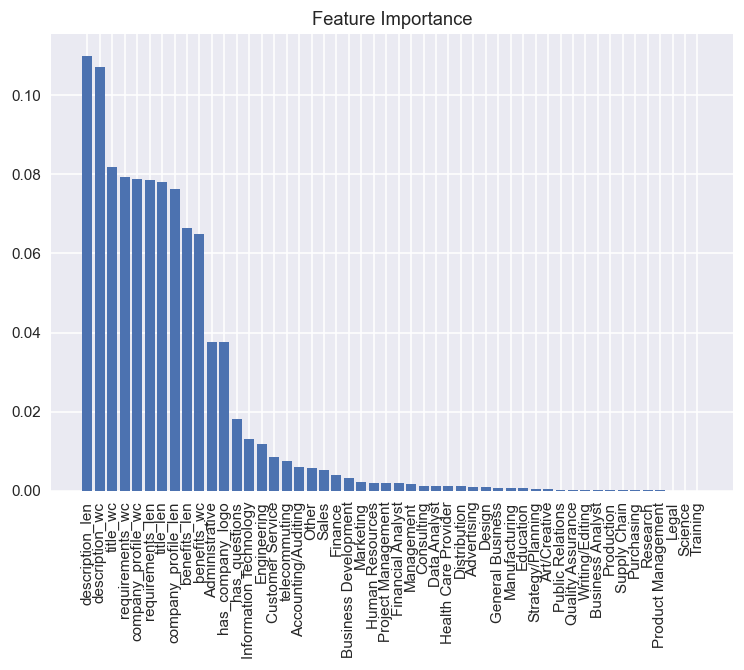

In [31]:
# Identifying Important Features in Random Forests

model = RandomForestClassifier(n_estimators=200, random_state=1)

model.fit(X, y)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
named = [X.columns[i] for i in indices]

# Create plot
plt.figure(dpi=110)
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), named, rotation=90)
# Show plot
plt.show()

In [32]:
# Firstly we try to improve the KNN 

In [33]:
# finding the number of neighbours with least error and good accuracy score
error =[]
lis=[]
for i in range(1,10):
    knn= KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    i_pred = knn.predict(X_test)
    knn_score=accuracy_score(y_test, i_pred)
    lis.append(knn_score)
    error.append(np.mean(i_pred != y_test))

Text(0, 0.5, 'error')

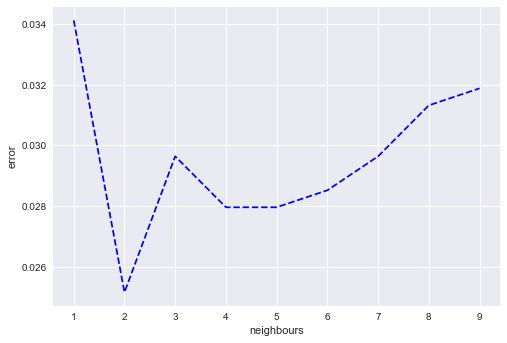

In [34]:
plt.plot(range(1,10),error,color='blue',linestyle = 'dashed')
plt.xlabel('neighbours')
plt.ylabel('error')

Text(0, 0.5, 'acccuracy')

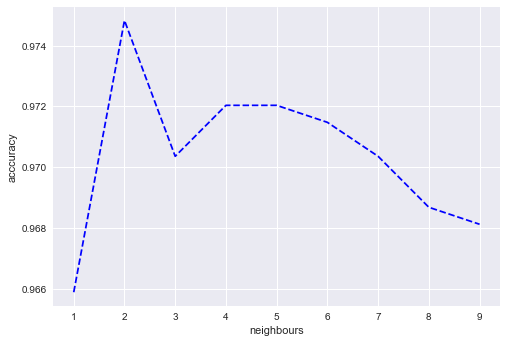

In [35]:
plt.plot(range(1,10),lis,color='blue',linestyle = 'dashed')
plt.xlabel('neighbours')
plt.ylabel('acccuracy')

In [36]:
# training the KNN 
knn_= KNeighborsClassifier(n_neighbors = 2)
knn_.fit(X_train, y_train)
y_pred_knn = knn_.predict(X_test)
knn_score=accuracy_score(y_test, y_pred_knn)

In [37]:
# improved accuracy score
knn_score

0.9748322147651006

In [38]:
# now we try to improve random forest

In [39]:
# finding the total number of suitable trees performing good with accuracy score
estim=[195,200]
score=[]
for es in estim:
    rf_=RandomForestClassifier(n_estimators=es, random_state=1, n_jobs=-1)
    rf_.fit(X_train,y_train)
    y_pred=rf_.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
    

In [40]:
score

[0.9843400447427293, 0.9843400447427293]

In [41]:
# to further improve it we try to find good number of minimum samples leaf.
msl=[0.001,1,2,3]
score_=[]
for ms in msl:
    rf_=RandomForestClassifier(n_estimators=200, min_samples_leaf=ms, random_state=1, n_jobs=-1)
    rf_.fit(X_train,y_train)
    y_pred=rf_.predict(X_test)
    score_.append(accuracy_score(y_test,y_pred))

In [42]:
score_

[0.9686800894854586,
 0.9843400447427293,
 0.9781879194630873,
 0.9759507829977628]

In [43]:
# train the Random forest classifier
rf= RandomForestClassifier(n_estimators=200, min_samples_leaf=1, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_score=accuracy_score(y_test, y_pred_rf)

In [44]:
# improved accuracy score
rf_score

0.9843400447427293

In [45]:
# confusion matrix of test data
cmat=confusion_matrix(y_test,y_pred_rf)
print(cmat)

[[1720    2]
 [  26   40]]


In [46]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1722
           1       0.95      0.61      0.74        66

    accuracy                           0.98      1788
   macro avg       0.97      0.80      0.87      1788
weighted avg       0.98      0.98      0.98      1788



In [47]:
# confusion matrix of full dataset
y_all_pred=rf.predict(X)
cmat2=confusion_matrix(y,y_all_pred)
print(cmat2)

[[17012     2]
 [   26   840]]


In [48]:
accuracy_score(y,y_all_pred)

0.9984340044742729

In [49]:
# voila! pretty good accuracy score.